<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/CE9wQaWrwGFL/12%E6%9C%8820%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第76章：Adamによる多項式近似

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def heatmap(f, x_min=-12, x_max=12, y_min=-12, y_max=12, h=0.1, drawline=False, cmap=plt.cm.jet):
    x_mg, y_mg = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = [[f([x, y]) for x, y in zip(xx, yy)] for xx, yy in zip(x_mg,y_mg)]
    plt.axes().set_aspect('equal')
    #plt.contourf(x_mg, y_mg, Z, cmap=cmap)
    plt.imshow(Z, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap=cmap)
    plt.colorbar()
    if drawline:
        plt.contour(x_mg, y_mg, Z, colors='black')
    plt.grid()
    #plt.show()

In [2]:
def adam(f, x0, lr=1e-2, beta1=0.9, beta2=0.999, step_num=500, h=1e-4, epsilon=1e-8):
    grad_history = []
    x_history = []
    v_history = []
    m_history = []
    x = x0
    v = np.zeros_like(x0)
    m = np.zeros_like(x0)
    for t in range(step_num):
        grad = numeric_differentiation(f, x, h=h)
        x_history.append(x)
        v_history.append(v)
        m_history.append(m)
        m = m + (1-beta1) * (grad - m)
        v = v + (1-beta2) * (grad**2 - v)
        lr_t = lr * (1 - beta2**(t+2))**0.5 /(1 - beta1**(t+2))
        x = x - lr_t * m / (np.abs(v) + epsilon)**0.5
    
    return x_history, grad_history, v_history, m_history

In [3]:
def numeric_differentiation(f, x, h=1e-4):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        tmp = x[i]

        # f(x+h)
        x[i] = tmp + h
        fxh1 = f(x)

        # f(x-h)
        x[i] = tmp - h
        fxh2 = f(x)

        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp

    return grad

In [4]:
X = [-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10]
Y_observed = [1.12, 0.28, -0.18, -0.27, -0.13, 0.21, 0.36, 0.49, 0.42, -0.05, -0.85]

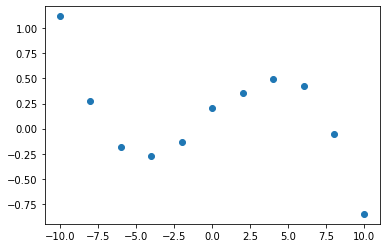

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X, Y_observed)

In [6]:
class Polynominal:
    def __init__(self, x_observed, y_observed):
        self.x_observed = x_observed
        self.y_observed = y_observed
        self.coeff = None

    def predict(self, x_latent):
        y = 0
        for i in range(len(self.coeff)):
            y += self.coeff[i] * x_latent ** i
        return y

    def mean_squared_error(self, y, t):
        return 0.5 * np.sum((y - t)**2)

    def __call__(self, w):
        self.coeff = w
        y_pred = self.predict(self.x_observed)
        return self.mean_squared_error(self.y_observed, y_pred)

In [7]:
X = np.array(X)
Y_observed = np.array(Y_observed)
objective = Polynominal(X, Y_observed) # __init__が呼び出される

In [8]:
objective([5, -5]) # __call__ が呼び出される

5558.2851

In [9]:
objective([5, -5, 3]) # __call__ が呼び出される

152969.8851

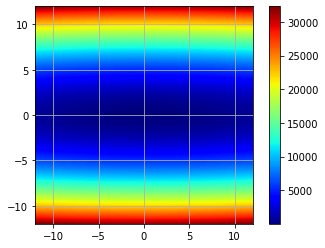

In [10]:
heatmap(objective)

In [11]:
X = np.array(X)
Y_observed = np.array(Y_observed)
objective = Polynominal(X, Y_observed) # __init__が呼び出される
histories = adam(objective, np.random.rand(4), step_num=20000)

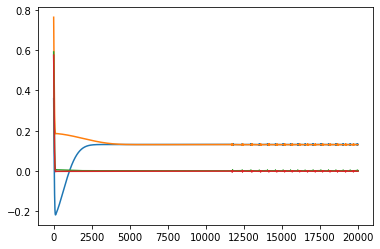

In [12]:
plt.plot(histories[0])

In [13]:
objective.coeff

array([ 1.30878930e-01,  1.30196193e-01,  2.22867437e-05, -2.29846525e-03])

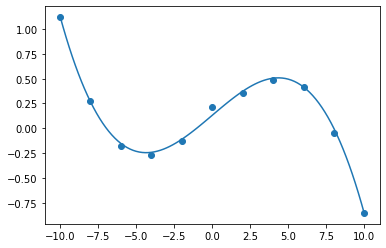

In [14]:
import matplotlib.pyplot as plt

x_latent = np.linspace(-10, 10, 101)

plt.scatter(X, Y_observed)
plt.plot(x_latent, objective.predict(x_latent))

In [15]:
X = np.array(X)
Y_observed = np.array(Y_observed)
objective = Polynominal(X, Y_observed) # __init__が呼び出される
histories = adam(objective, np.random.rand(2), step_num=20000)

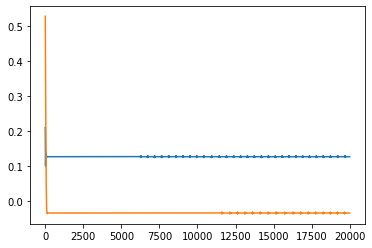

In [16]:
plt.plot(histories[0])

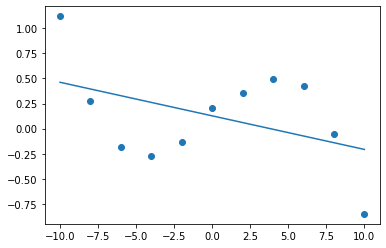

In [17]:
import matplotlib.pyplot as plt

x_latent = np.linspace(-10, 10, 101)

plt.scatter(X, Y_observed)
plt.plot(x_latent, objective.predict(x_latent))

# 第77章：Adamによる線形回帰

In [18]:
data1 = [
 [3.41, 1.83], [1.58, 1.81], [3.35, 2.20], [1.92, 1.41], [1.72, 1.62],
 [3.44, 1.40], [3.52, 1.88], [1.65, 1.24], [2.82, 1.04], [1.87, 1.14],
 [2.78, 0.94], [2.52, 1.14], [2.64, 1.07], [1.51, 1.64], [1.43, 1.86],
 [3.09, 1.38], [2.49, 0.85], [3.21, 1.35], [2.17, 1.24], [2.91, 1.21]
]
target1 = [
 4.15, 0.50, 3.94, 1.56, 0.96,
 4.61, 4.34, 1.15, 3.55, 1.63,
 3.45, 2.93, 3.19, 0.52, 0.17,
 3.93, 2.82, 4.19, 2.19, 3.69
]

In [19]:
data2 = [
 [1.43, 2.49], [1.94, 2.50], [2.22, 2.22], [2.33, 2.11], [1.74, 2.30],
 [0.40, 1.53], [1.19, 2.34], [0.46, 1.52], [0.69, 2.17], [0.91, 2.35],
 [2.31, 2.21], [2.61, 1.66], [0.77, 2.10], [0.44, 1.65], [2.00, 2.35],
 [2.42, 1.57], [1.77, 2.50], [2.30, 1.84], [0.86, 2.16], [1.19, 2.47]
]
target2 = [
 8.47, 9.49, 9.46, 9.41, 8.06,
 5.45, 8.13, 5.52, 8.24, 8.71,
 9.75, 8.24, 7.90, 6.00, 9.12,
 7.52, 8.94, 8.23, 8.03, 8.65
]

In [20]:
class LinearRegression:
    def __init__(self, x_observed, y_observed):
        self.x_observed = x_observed
        self.y_observed = y_observed
        self.coeff = None

    def predict(self, x_latent):
        y = self.coeff[0] + x_latent @ self.coeff[1:]
        return y

    def mean_squared_error(self, y, t):
        return 0.5 * np.sum((y - t)**2)

    def __call__(self, w):
        self.coeff = w
        y_pred = self.predict(self.x_observed)
        return self.mean_squared_error(self.y_observed, y_pred)

In [21]:
X = np.array(data1)
Y = np.array(target1)
objective = LinearRegression(X, Y)
histories = adam(objective, np.random.rand(3), step_num=20000)

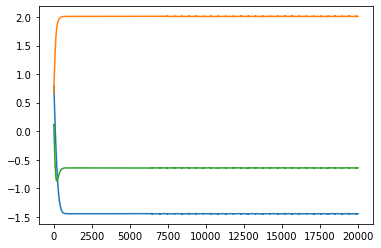

In [22]:
plt.plot(histories[0])

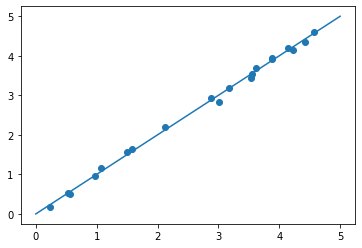

In [23]:
plt.scatter(objective.predict(X), Y) # 実測値・予測値プロット
plt.plot([0, 5], [0, 5])

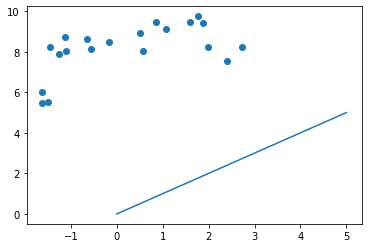

In [24]:
plt.scatter(objective.predict(np.array(data2)), np.array(target2)) # 実測値・予測値プロット
plt.plot([0, 5], [0, 5])

# 第78章：Adamによるロジスティック回帰（１変数）

In [31]:
!wget https://raw.githubusercontent.com/maskot1977/toydata/main/data/infection_test.txt 

--2022-12-23 02:00:39--  https://raw.githubusercontent.com/maskot1977/toydata/main/data/infection_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8698 (8.5K) [text/plain]
Saving to: ‘infection_test.txt.1’

infection_test.txt. 100%[===================>]   8.49K  --.-KB/s    in 0s      

2022-12-23 02:00:39 (88.4 MB/s) - ‘infection_test.txt.1’ saved [8698/8698]



In [32]:
import pandas as pd

df = pd.read_csv("infection_test.txt")
df

,Measurements,Symptoms
0,6.549,Infected
1,6.520,Infected
2,7.267,Infected
3,4.675,Infected
4,8.494,Infected
...,...,...
495,4.338,NotInfected
496,2.233,NotInfected
497,2.970,NotInfected
498,3.460,NotInfected


In [33]:
infected = []
not_infected = []
for m, s in df.values:
    if s == 'Infected':
        infected.append(m)
    else:
        not_infected.append(m)

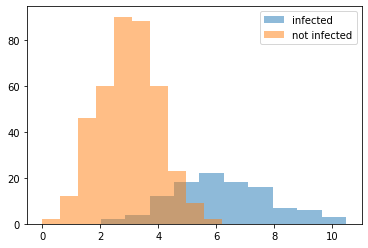

In [34]:
import matplotlib.pyplot as plt
plt.hist(infected, alpha=0.5, label="infected")
plt.hist(not_infected, alpha=0.5, label="not infected")
plt.legend()
plt.show()

In [35]:
y1 = [1 for _ in infected]
y2 = [0 for _ in not_infected]
Y = np.array(y1 + y2)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
X = np.array(infected + not_infected)
X = X.reshape(len(X), 1)
X

array([[ 6.549e+00],
       [ 6.520e+00],
       [ 7.267e+00],
       [ 4.675e+00],
       [ 8.494e+00],
       [ 6.079e+00],
       [ 6.933e+00],
       [ 6.240e+00],
       [ 8.202e+00],
       [ 5.689e+00],
       [ 4.132e+00],
       [ 5.201e+00],
       [ 7.048e+00],
       [ 4.301e+00],
       [ 4.997e+00],
       [ 6.034e+00],
       [ 5.269e+00],
       [ 6.270e+00],
       [ 4.414e+00],
       [ 4.721e+00],
       [ 9.219e+00],
       [ 5.406e+00],
       [ 8.931e+00],
       [ 7.678e+00],
       [ 8.128e+00],
       [ 6.746e+00],
       [ 7.844e+00],
       [ 4.948e+00],
       [ 1.009e+01],
       [ 5.399e+00],
       [ 7.660e+00],
       [ 4.095e+00],
       [ 5.703e+00],
       [ 4.554e+00],
       [ 7.156e+00],
       [ 8.025e+00],
       [ 7.240e+00],
       [ 5.396e+00],
       [ 9.028e+00],
       [ 5.393e+00],
       [ 3.991e+00],
       [ 6.895e+00],
       [ 7.703e+00],
       [ 5.889e+00],
       [ 4.498e+00],
       [ 5.222e+00],
       [ 2.012e+00],
       [ 5.44

In [68]:
class LogisticRegression:
    def __init__(self, x_observed, y_observed):
        self.x_observed = x_observed
        self.y_observed = y_observed
        self.coeff = None

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def predict(self, x_latent):
        y = self.sigmoid(self.coeff[0] + x_latent @ self.coeff[1:])
        return y

    def mean_squared_error(self, y, t):
        return 0.5 * np.sum((y - t)**2)

    def __call__(self, w):
        self.coeff = w
        y_pred = self.predict(self.x_observed)
        return self.mean_squared_error(self.y_observed, y_pred)

In [69]:
objective = LogisticRegression(X, Y)
histories = adam(objective, np.random.rand(2), step_num=20000)

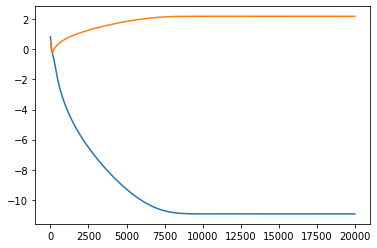

In [70]:
plt.plot(histories[0])

In [71]:
objective.coeff

array([-10.94332284,   2.20290212])

In [72]:
-objective.coeff[0] / objective.coeff[1]

4.967684549065366

In [74]:
objective.predict(X)

array([9.70214144e-01, 9.68311470e-01, 9.93726745e-01, 3.44172364e-01,
       9.99577174e-01, 9.20423800e-01, 9.86995854e-01, 9.42826211e-01,
       9.99195818e-01, 8.30473581e-01, 1.36941191e-01, 6.25736931e-01,
       9.89876606e-01, 1.87149292e-01, 5.16139159e-01, 9.12853800e-01,
       6.60106409e-01, 9.46286117e-01, 2.27986984e-01, 3.67391917e-01,
       9.99914357e-01, 7.24234833e-01, 9.99838492e-01, 9.97453688e-01,
       9.99053569e-01, 9.80496304e-01, 9.98232185e-01, 4.89160915e-01,
       9.99987427e-01, 7.21144483e-01, 9.97350965e-01, 1.27589872e-01,
       8.34771403e-01, 2.86732547e-01, 9.92002882e-01, 9.98812796e-01,
       9.93344861e-01, 7.19813564e-01, 9.99869561e-01, 7.18478773e-01,
       1.04187360e-01, 9.85876448e-01, 9.97589799e-01, 8.83866718e-01,
       2.62179906e-01, 6.36506230e-01, 1.48465994e-03, 7.42746119e-01,
       9.97088533e-01, 9.74084878e-01, 4.47498319e-01, 5.22737780e-01,
       4.21676145e-02, 9.98657132e-01, 9.89743294e-01, 9.96491094e-01,
      

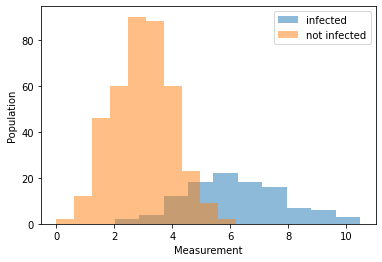

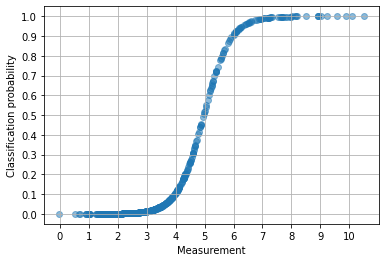

In [84]:
import matplotlib.pyplot as plt

x_latent = np.linspace(0, 11, 100)
plt.hist(infected, alpha=0.5, label="infected")
plt.hist(not_infected, alpha=0.5, label="not infected")
plt.legend()
plt.xlabel("Measurement")
plt.ylabel("Population")
plt.show()

plt.scatter(X, objective.predict(X), alpha=0.5)
plt.xticks(np.linspace(0, 10, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.xlabel("Measurement")
plt.ylabel("Classification probability")
plt.show()

# 第79章：Adamによるロジスティック回帰（２変数）

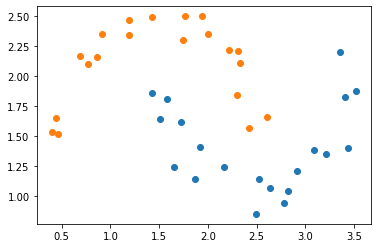

In [ ]:
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

In [ ]:
y1 = [1 for x in data1]
y2 = [0 for x in data2]
Y = np.array(y1 + y2)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X = np.array(data1 + data2)
X

array([[3.41, 1.83],
       [1.58, 1.81],
       [3.35, 2.2 ],
       [1.92, 1.41],
       [1.72, 1.62],
       [3.44, 1.4 ],
       [3.52, 1.88],
       [1.65, 1.24],
       [2.82, 1.04],
       [1.87, 1.14],
       [2.78, 0.94],
       [2.52, 1.14],
       [2.64, 1.07],
       [1.51, 1.64],
       [1.43, 1.86],
       [3.09, 1.38],
       [2.49, 0.85],
       [3.21, 1.35],
       [2.17, 1.24],
       [2.91, 1.21],
       [1.43, 2.49],
       [1.94, 2.5 ],
       [2.22, 2.22],
       [2.33, 2.11],
       [1.74, 2.3 ],
       [0.4 , 1.53],
       [1.19, 2.34],
       [0.46, 1.52],
       [0.69, 2.17],
       [0.91, 2.35],
       [2.31, 2.21],
       [2.61, 1.66],
       [0.77, 2.1 ],
       [0.44, 1.65],
       [2.  , 2.35],
       [2.42, 1.57],
       [1.77, 2.5 ],
       [2.3 , 1.84],
       [0.86, 2.16],
       [1.19, 2.47]])

In [ ]:
objective = LogisticRegression(X, Y)
histories = adam(objective, np.random.rand(3), step_num = 10000)

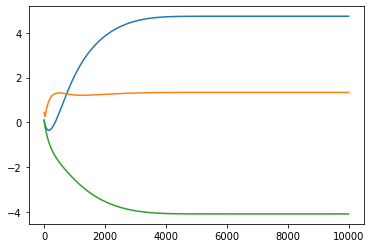

In [ ]:
plt.plot(histories[0])

In [ ]:
objective.coeff

array([ 4.73889727,  1.3374778 , -4.08396646])

In [ ]:
x1 = np.linspace(0, 4, 2)
x2 = -(objective.coeff[0] + objective.coeff[1] * x1) / objective.coeff[2]

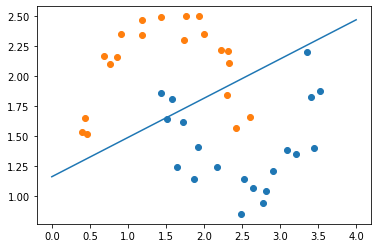

In [ ]:
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])
plt.plot(x1, x2)

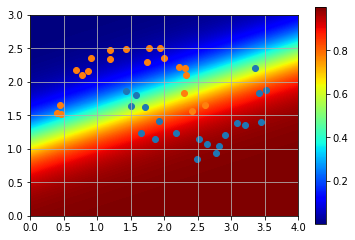

In [ ]:
heatmap(objective.predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

# 第80章：Numpy.polyfitによる多項式近似

In [ ]:
X = [-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10]
Y_observed = [1.12, 0.28, -0.18, -0.27, -0.13, 0.21, 0.36, 0.49, 0.42, -0.05, -0.85]

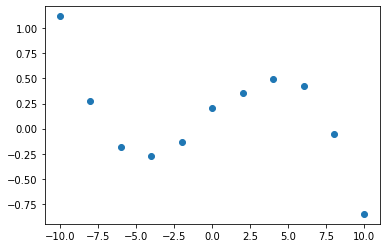

In [ ]:
plt.scatter(X, Y_observed)

In [ ]:
import numpy as np

coeff = np.polyfit(X, Y_observed, 10)
coeff

array([-5.98779641e-09,  2.61041012e-09,  1.32791832e-06, -4.29506655e-07,
       -9.99936704e-05,  1.92147714e-05,  3.04459980e-03, -2.54584849e-03,
       -3.44119544e-02,  1.32402778e-01,  2.10000000e-01])

In [ ]:
x_latent = np.linspace(min(X), max(X), 100)
fitted_curve = np.poly1d(coeff)(x_latent)

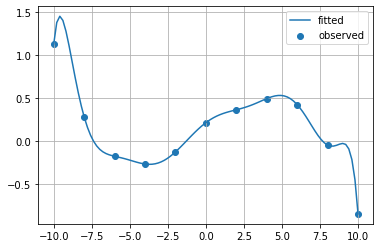

In [ ]:
plt.scatter(X, Y_observed, label="observed")
plt.plot(x_latent, fitted_curve, label="fitted")
plt.grid()
plt.legend()
plt.show()

# 第81章：Sympy

In [ ]:
!pip install sympy==1.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 9.1 MB/s 
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


In [ ]:
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline

In [ ]:
# Google Colab 使用の場合、SympyによるTeX表示をサポートするために実行する
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)

sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [ ]:
a = sym.Symbol('a')

In [ ]:
a, b, c, x, y = sym.symbols("a b c x y")

In [ ]:
f = sym.Function('f')
g = sym.Function('g')

In [ ]:
# 数式は英語で numerial expression または numerical formula
expr = x**2-12*x+8
expr

 2           
x  - 12⋅x + 8

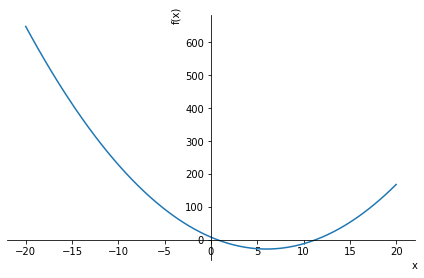

In [ ]:
# 得られた関数を図示
plot(expr, (x, -20, 20))

In [ ]:
# 因数分解
expr = x**2 + 2*x + 1
sym.factor(expr)

       2
(x + 1) 

In [ ]:
# 等式は英語で equation または equality
expr = x**2 - 12 * x + 8
eq = sym.Eq(expr, 0)
eq

 2               
x  - 12⋅x + 8 = 0

In [ ]:
# 方程式を解く
sym.solve(eq)

[6 - 2⋅√7, 2⋅√7 + 6]

In [ ]:
# 代数を使った式も取り扱える
eq = sym.Eq(a * x ** 2 + b * x + c, 0)
eq

   2              
a⋅x  + b⋅x + c = 0

In [ ]:
# xについて解く
sym.solve(eq, x)

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦

In [ ]:
# 連立方程式
eq1 = 3 * x + 5 * y - 29
eq2 = x + y - 7

sym.solve([eq1, eq2])

{x: 3, y: 4}

# 第82章：Scipy.optimize

In [ ]:
import math
from scipy import optimize

f = lambda x: math.exp(x) - 3 * x

optimize.bisect(f, 0, 1)

0.619061286737633

In [ ]:
import math
from scipy import optimize

f = lambda x: math.exp(x) - 3 * x

optimize.newton(f, 0)

0.6190612867359452

# 第83章：Scipy.integrate

In [ ]:
import math
from scipy import integrate

f = lambda x: 4 / (x**2 + 1)

integrate.quad(f, 0, 1)

(3.1415926535897936, 3.4878684980086326e-14)

# 第84章：Scipy.interpolate

https://qiita.com/maskot1977/items/913ef108ff1e2ba5b63f